In [42]:
import matplotlib.pyplot as plt
import numpy as np


class LinReg:
    def __init__(self, data_in, data_out, lamb=0, l_rate=.01):  # For pre-processing data.
        self.x = np.array(data_in, dtype=np.float64)  # data_in=training input,
        self.y = np.array(data_out, dtype=np.float64)  # data_out=training output
        self.m = int(data_in.shape[0])  # No. of training exapmles
        self.lamb = int(lamb)
        try:
            self.col1 = int(data_in.shape[1])  # No. of features plus bias
        except IndexError:
            self.col1 = 1  # For one feature training set
        self.x = np.transpose(self.x)
        self.y = np.reshape(self.y, (1, self.m))
        self.wt = np.zeros((1,self.col1), dtype=float)  # defining weights matrix OR array
        self.temp = np.empty((1,self.col1), dtype=np.float64)
        self.x=np.ndarray.flatten(self.x)
        self.x=np.reshape(self.x,(self.col1,self.m))
        
        
        try:
            self.xs = np.array_split(self.x, 2, axis=1)
        except:
            self.xs = np.array_split(self.x, 2)

        self.ys = np.array_split(self.y, 2,axis=1)
        self.x = np.array(self.xs[0])
        self.xcv = np.array(self.xs[1])
        self.y = np.array(self.ys[0])
        self.ycv = np.array(self.ys[1])
        self.bias = 0.00
        self.l_rate = float(l_rate)

    def y_pred(self):  # prediction of output
        return np.dot(self.wt, self.x) + self.bias

    def y_cost(self):  # cost function
        m = self.lamb / (2 * self.m)
        rss = np.zeros(self.col1, dtype=np.float64)
        rss = self.y - self.y_pred()
        rss = np.sum(np.square(rss))+ np.sum(np.square(self.wt)) * m + (self.bias ** 2) * m
        return np.mean(rss)

    def update(self):  # gradient descent
        self.temp = np.zeros(self.col1, dtype=np.float64)
        self.temp = np.dot((self.y_pred() - self.y), self.x.T) / self.m + self.lamb * np.sum(self.wt) / self.m
        self.wt = self.wt - self.l_rate * self.temp
        self.bias -= np.sum(self.y_pred() - self.y) * self.l_rate / self.m

    def train(self, epoch=1000):  # model training function with traditional..
        for j in range(int(epoch)):  # gradient descent
            self.y_pred()
            self.y_cost()
            self.update()
            self.wt0=self.wt
        return self.wt

    def batch_train(self, epoch):  # model training function with batch ...
        n = int(self.m / 50) + 1  # gradient descent

        try:
            self.x_split = np.array_split(self.x, n, axis=1)
        except:
            self.x_split=np.array_split(self.x,n)
        try:
            self.y_split = np.array_split(self.y, n, axis=1)
        except:
            self.y_split = np.array_split(self.y, n)
        for j in range(epoch):
            for i in range(n):
                self.x = np.array(self.x_split[i])
                self.y = np.array(self.y_split[i])
                self.train(10)

    def model_accu_vs_epoch(self,ll,ul,step):  # Plot showing accuracy of model vs epoch attained for taraining
        self.wt= np.zeros((1,self.col1), dtype=float)
        self.bias=0.00
        epoch = np.arange(int(ll), int(ul), int(step))
        accu = np.zeros(epoch.shape[0], dtype=float)
        for i in range(epoch.shape[0]):
            self.train(epoch[i])
            accu[i] = 100 - np.mean(np.abs(self.y_pred() - self.y) // np.abs(self.y)) * 100
        plt.xlabel = 'Epoch'
        plt.ylabel = 'Accuracy'
        plt.plot(epoch, accu)

    def test(self, test_data_in, test_data_out):
        self.x_test = np.array(test_data_in)
        m2 = int(self.x_test.shape[0])
        self.y_test = np.array(test_data_out)
        self.y_test = np.reshape(self.y_test, (m2, 1))
        self.x_test = self.x_test.T

    def y_pred_test(self):
        return np.dot(self.wt, self.x_test) + self.bias

    def model_accu_test(self):
        cost = np.sum(np.square(self.y_test - self.y_pred_test()) // self.y_test)
        accu = np.mean(np.sqrt(cost) // self.m) * 100 * (-1) + 100
        print("The above model has ", accu, "% accuracy")
        return accu

    def cost_cv(self):  # cross-validation cost
        y = np.dot(self.wt, self.xcv)
        cost = np.mean(np.square(y - self.ycv))
        return cost

    def predict1(self, x):
        x = np.array(x)
        m=x.shape[0]
        x=np.reshape(x,(m,1))
        return np.dot(self.wt, x)

In [56]:
x=np.arange(1000).reshape(100,10)/100
y=np.arange(100)/10

In [57]:
d=LinReg(x,y)

In [51]:
d.ys

[array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
         26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
         39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]]),
 array([[50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
         63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.,
         76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88.,
         89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]])]

In [58]:
d.train(50)


array([[0.09707241, 0.09732996, 0.0975875 , 0.09784505, 0.09810259,
        0.09836014, 0.09861768, 0.09887523, 0.09913277, 0.09939032]])

C:\Users\Pratik  Bedre\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in floor_divide


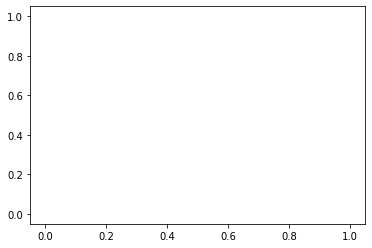

In [62]:
d.model_accu_vs_epoch(1,10,1)